# Linear Regression

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=4swNt7PiamQ&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=2

## Concept

In linear regression we want to predict continuous values whereas in classification we want to predict a discrete value lika a class label 0 or 1.

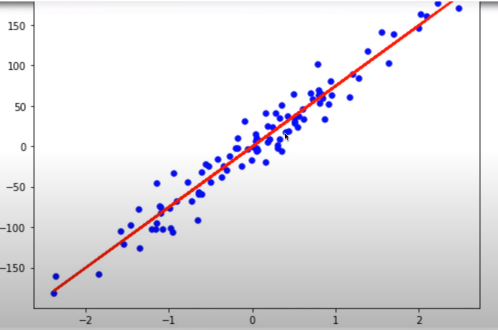

If we have a look at this example plot then we have our data, the blue dots. We want to approximate this data with a linear function.

## Approximation

$ \hat{y} = wx + b $

### Notes

this is the line equation where w (weights) is the slope and b is the bias or just the shift along y axis in 2 d case. We have to come up with this w and the b. We find them by defininf a cost function.

## Cost function

$\displaystyle MSE = J(w,b) = \frac{1}{N}\sum_{i=1}^{n}(y_{i} - (wx_{i} + b))^{2} $

$ J'(m,b) = \begin{bmatrix} \frac{df}{dw} \\ \frac{df}{db} \end{bmatrix} = \begin{bmatrix} \frac{1}{N} \sum -2x_{i}(y_{i} - (wx_{i} +b)) \\ \frac{1}{N} \sum -2(y_{i} - (wx_{i} +b)) \end{bmatrix}$

### Notes

In linear regression cost function is the mean squared error (MSE). MSE is the difference between the actual value and the approximated value. We get the actual values from training samples and then we square this difference and sum over all the samples and then divide byt the number of samples. This way we get the MSE. We want to have the error as small as possible so we have to find the minimum of this function. We find minimum by calculating the derivative or the gradient.

We calculate the gradient of our cost function with respect to w and with respect to b. Now with this gradient we use a technique that is called gradient descent.

## Gradient Descent

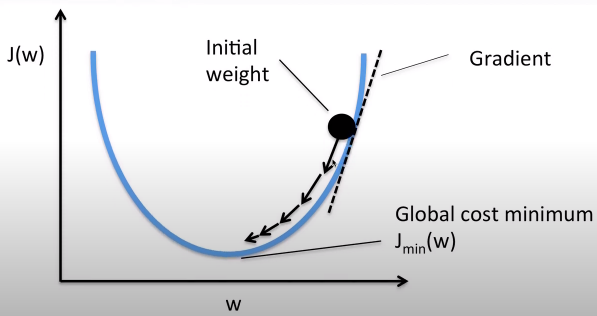

### Notes

Gradient descent is an iterative method to get to the minimum. If we have object or cost function in this case, then we start somewhere so we have some initialization of the weights and the bias. Then we want to go into the direction of the steepest descent and the steepesr descent is also the gradient. We want t go into the negative direction of the gradient. We do this iteratively until we finally reach the minimum. With each itteration we have an update rule for the new weights and the new bias.

## Update Rules

$ w = w - \alpha \cdot dw $ <br>
$b = b - \alpha \cdot db $

### Notes

The new w is the old w minus alpha times the derivative. Minus alpha because we want to go into the negative direction. Alpha is the so-called learning rate and this is an important parameter for our model.

$ \displaystyle \frac{dJ}{dw} = dw = \frac{1}{N} \sum_{i=1}^{n} -2x_{i}(y_{i} - (wx_{i} + b)) = \frac{1}{N} \sum_{i=1}^{n} -2x_{i}(y_{i} - \hat{y}) = \frac{1}{N} \sum_{i=1}^{n} -2x_{i}( \hat{y} - y_{i})$ <br>
$ \displaystyle \frac{dJ}{db} = db = \frac{1}{N} \sum_{i=1}^{n} -2(y_{i} - (wx_{i} + b)) = \frac{1}{N} \sum_{i=1}^{n} -2(y_{i} - \hat{y}) = \frac{1}{N} \sum_{i=1}^{n} -2( \hat{y} - y_{i})$

## Learning Rate

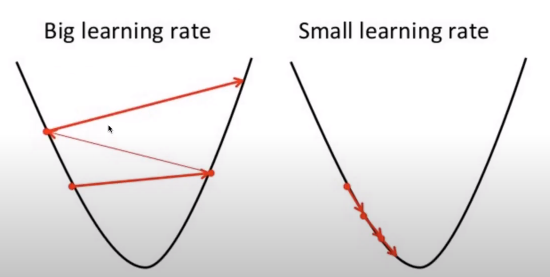

### Notes

Learning rate is an important parameter for our model. The learning rate defines how far we go into this direction with each iteraion step. For example if we use a small learning rate then it may take longer but it can finally reach the minimum and if we use a big learning rate then it might be faster but it might also jump around like on picture above and never find the minimum.

In [14]:
import numpy as np

class LinearRegression:
    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        # init parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            dw = (1/n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1/n_samples) * np.sum(y_predicted - y)
            
            self.weights -= self.lr * dw
            self.bias -= self.lr *db
    
    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

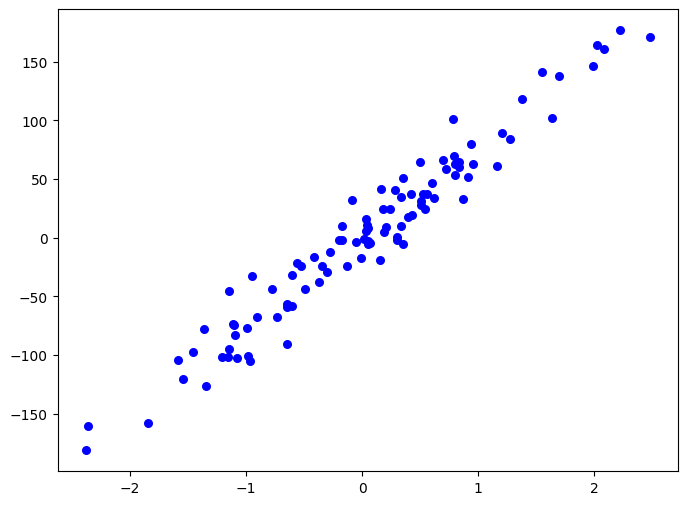

In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color = 'b', marker = 'o', s = 30)
plt.show()

In [16]:
# ND array of size 80 by 1
print('X train shape: ', X_train.shape)
# one dimension row vector of size 80
print('y train shape', y_train.shape)

X train shape:  (80, 1)
y train shape (80,)


In [17]:
def mse(y_true, y_predicted):
    return np.mean((y_true - y_predicted)**2)

In [18]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

mse_value = mse(y_test, predicted)
print('Mean squared error', mse_value)

Mean squared error 783.8155465125494


In [19]:
# another try with different learning rate

regressor2 = LinearRegression(lr=0.01)
regressor2.fit(X_train, y_train)
predicted2 = regressor2.predict(X_test)

mse_value2 = mse(y_test, predicted2)
print('Mean squared error', mse_value2)

Mean squared error 305.7719958301902


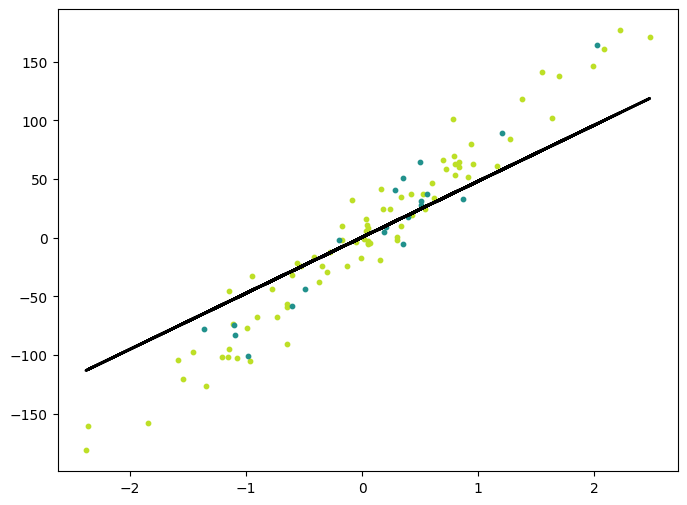

In [20]:
# plot with first learning rate
y_pred_line = regressor.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()

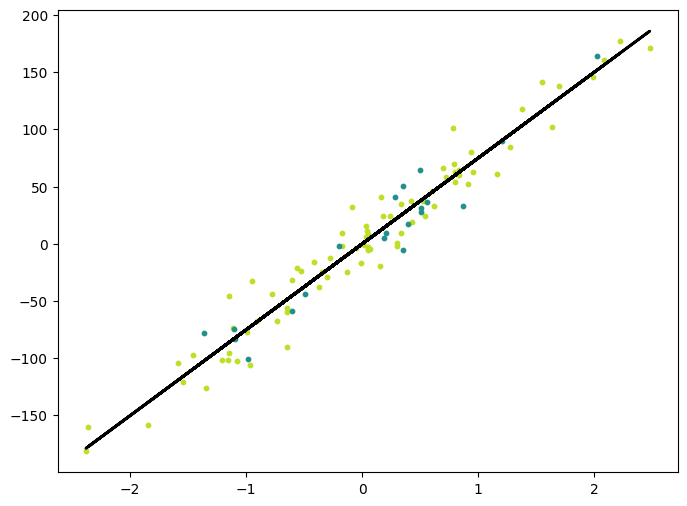

In [21]:
# plot after changing learnig rate
y_pred_line = regressor2.predict(X)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_line, color='black', linewidth=2, label="Prediction")
plt.show()